# <center> <font color=8AAA79> Continuous culture </font> </center> 

##  <font color=E07A5F> Introduction </font>

Continuous culture is a continuous stirred-tank reactor (CSTR) employed for the continuous production of microbial biomass, based on the continuous addition of sterilized nutrient medium and the elution of the culture fluid at the same steady flow rate in the bioreactor. It's a cultural process in which the cell population grows at a constant concentration and volume, meaning that cells' growth rate is maintained in the exponential phase: this process is defined as ' steady-state of growth'.

Continuous cultures present various advantages:


- Easy control over various environmental parameters (pH, population density, product concentration, etc.) 
- Long time maintenance of the exponential phase
- Continuous product elution prevents the accumulation of toxic secondary metabolites
- Constant working volume simplifies culture scale-up
- Cost-effective, time and energy conservation on the industrial scale as the number of stages of the process are reduced (cleaning, sterilization, preparation of starter cultures, etc.)

As well as disadvantages:

- high risk of contamination due to the absence of proper cleaning and sterilization steps
- need of specific equipment
- need of high technical skills to maintain the cells' steady-state

A commonly used continuous culture method is the chemostat: a fermenter in which the cell density is kept constant by keeping the dilution rate and flow rate of nutrient medium constant. The sterile nutrient medium is added into the reservoir along with the microbial cells. Substrate is continuously added into the reservoir, and the by-products are continuously eluted allowing the  cells to grow at a constant rate (exponential phase) as there will be no nutrient depletion due to continuous nutrient supply into the reservoir.
Growth rate is determined by the rate at which the new medium is fed into the reservoir, while dilution rate controls the substrate concentration 
This system depends on the fact that the concentration of essential nutrients within the culture vessel will control the growth rate of the cell.

Chemostat depends upon two factors:

1. Dilution rate: flow of the nutrient medium into the reservoir divided by the culture volume within the vessel. A change in dilution rate changes the cells' growth rate (both cell growth and cell density). 

2. Concentration of limiting nutrient: an essential nutrient or amino acid is added in limited quantity in the reactor. Limiting the concentration of this nutrient allows the determination of the nutrient medium’s flow rate into the reservoir and therefore the determination of the cells’ growth rate. 

## <font color=E07A5F> Kinetic parameters </font>

Cell growth can be described through 4 main parameters: the two kinetic parameters μmax and Ks, and the two stoichiometric parameters YX/s and Smin. The Monod model is the most common mathematical model that describes the relationship between growth rate and the concentration of a single growth-controlling substrate through the maximum specific growth rate (μmax), and the substrate affinity constant (Ks). This model shows that biomass grows in proportion to the substrate consumption, expressed by the following formula:

\begin{equation}
µ=\frac{µmax*S}{Ks+S}
\end{equation}
<div style="direction:rtl"> (1) </div>

Which is analogous to the Michaelis-Menten expression for enzyme kinetics:

\begin{equation}
v0=\frac{vmax*S}{Km+S}
\end{equation} 
<div style="direction:rtl"> (2) </div>

As inflow equals outflow:

\begin{equation}
V=constant
\end{equation}
<div style="direction:rtl"> (3) </div>

At a steady-state, specific groth rate (µ) equals the dilution rate (D):

\begin{equation}
µ=D
\end{equation}
<div style="direction:rtl"> (4) </div>

Where dilution rate (D) is equal to flow rate (F) over volume (V):


\begin{equation}
D=\frac{Q}{V}
\end{equation}
<div style="direction:rtl"> (5) </div>

The maximum operating flow rate corresponds to the critical dilution rate (Dcrit):

\begin{equation}
Dcrit=\frac{µmax*S}{Ks+S}
\end{equation}
<div style="direction:rtl"> (6) </div>

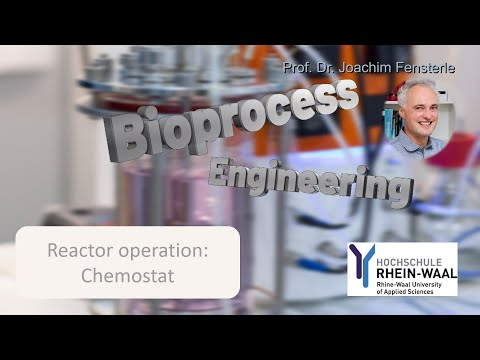

In [1]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('poUzTlCHRJQ')

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math
import ipywidgets
%run IndFermSim_functions.ipynb


In [4]:
Y_xs1   = get_float_input("Enter the first desired Y_xs value: ")
mu_max1 = get_float_input("Enter the first desired mu_max value: ")
s_in1   = get_float_input("Enter the first desired s_in value: ")


Enter the first desired Y_xs value:  0.06
Enter the first desired mu_max value:  0.3
Enter the first desired s_in value:  12


D optimal : 0.2615889360201312
Max Biomass Concentratin : 0.72


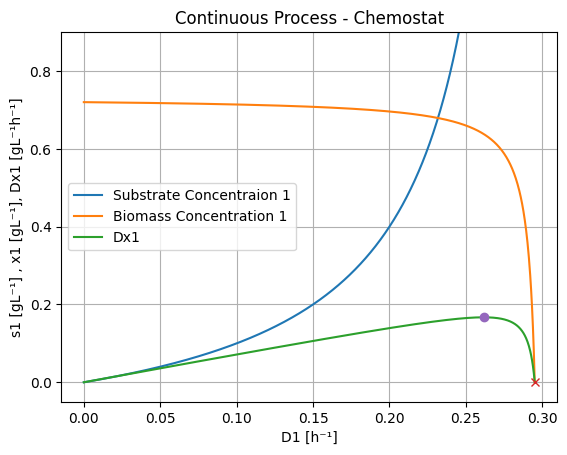

In [7]:
K_s = 0.2
#Y_xs1 = 0.06
#mu_max1 = 0.3
#s_in1 = 12

Dcrit1 = mu_max1 * (s_in1 / (K_s + s_in1))
Dopt1 = mu_max1 * ( 1 - (math.sqrt( K_s / (K_s +s_in1))))
D1 = np.linspace(0, Dcrit1, 1000)   # in 1/h

s1 = K_s * (D1 / (mu_max1 - D1))
x1 = Y_xs1 * ( s_in1 - s1)
Dx1 = ( mu_max1 * (s1 / (K_s + s1))) * (Y_xs1 * ( s_in1 - s1))


print ("D optimal :",Dopt1)
print ("Max Biomass Concentratin :",max(x1))


plt.plot(D1,s1, label = "Substrate Concentraion 1")
plt.plot(D1, x1 , label = "Biomass Concentration 1")
plt.plot(D1, Dx1 , label = "Dx1")
plt.plot(Dcrit1,0.0, marker = 'x')
plt.plot(Dopt1, np.max(Dx1), marker = 'o')


plt.ylim([-0.05 ,Y_xs1 * ( s_in1 - s1[0]+ 3)])

plt.legend() 
plt.title("Continuous Process - Chemostat")
plt.xlabel("D1 [h⁻¹]")
plt.ylabel("s1 [gL⁻¹] , x1 [gL⁻¹], Dx1 [gL⁻¹h⁻¹]")
plt.grid(True)
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import math

K_s = 0.2
interact(plot_graph,Y_xs=FloatSlider(value=0.1, min=0, max=0.2, step=0.01, description='Y_xs'),
                    mu_max=FloatSlider(value=0.1, min=0.1, max=0.5, step=0.01, description='mu_max'),
                    s_in=FloatSlider(value=1, min=8, max=15, step=1, description='s_in'));



interactive(children=(FloatSlider(value=0.1, description='Y_xs', max=0.2, step=0.01), FloatSlider(value=0.1, d…